# 스피어마 상관분석
스피어만 상관계수는 두 변수간의 순위 순서를 기반으로 상관관계 측정

순위데이터 또는 서열데이터에서 사용되며 정확한 값보다 상대적인 순위가 중요한 경우 사용

값 자체 보다는 값의 상대적인 순위가 중요

> 자동차 성능 순위나 음악차트 등의 데이터 유형

피어슨 상관계수보다는 이상치에 강건하며, 비선형적인 관계도 잘 캡처할 수 있음

값의 범위는 -1~1임 피어슨 상관계수와 마찬가지로 1에 가까울수록 양의 상관관계, -1 에 가까울수록 음의 상관관계를 의미하며, 0에 가까울수록 상관관계가 없음을 의미함.


## #01. 작업준비
### 패키지 가져오기



In [10]:
import numpy as np
import pandas as pd
from scipy import stats
from matplotlib import pyplot as plt
import sys
import seaborn as sb
import os 



### 데이터 가져오기

In [11]:
df= pd.read_excel('https://data.hossam.kr/E03/mtcars.xlsx',index_col="name")
df

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
name,,,,,,,,,,,
Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2
Valiant,18.1,6,225.0,105,2.76,3.460,20.22,1,0,3,1
Duster 360,14.3,8,360.0,245,3.21,3.570,15.84,0,0,3,4
Merc 240D,24.4,4,146.7,62,3.69,3.190,20.00,1,0,4,2
Merc 230,22.8,4,140.8,95,3.92,3.150,22.90,1,0,4,2


## #02. 데이터 전처리
분석 대상칼럼만 추출

cyl	vs	am	gear	carb


In [12]:
df=df.filter(['mpg','vs','am','gear','carb'])
df

,mpg,vs,am,gear,carb
name,,,,,
Mazda RX4,21.0,0,1,4,4
Mazda RX4 Wag,21.0,0,1,4,4
Datsun 710,22.8,1,1,4,1
Hornet 4 Drive,21.4,1,0,3,1
Hornet Sportabout,18.7,0,0,3,2
Valiant,18.1,1,0,3,1
Duster 360,14.3,0,0,3,4
Merc 240D,24.4,1,0,4,2
Merc 230,22.8,1,0,4,2


## #02. 스피어만 상관분석

### 1. 상관행렬

In [13]:
df.corr(method='spearman')



,mpg,vs,am,gear,carb
mpg,1.000000,0.706597,0.562006,0.542782,-0.657498
vs,0.706597,1.000000,0.168345,0.282662,-0.633695
am,0.562006,0.168345,1.000000,0.807688,-0.064365
gear,0.542782,0.282662,0.807688,1.000000,0.114887
carb,-0.657498,-0.633695,-0.064365,0.114887,1.000000


### 2. 산점도 행렬

명목형 변수에 따라 데이터가 몰려있기떄문에 데이터 해석이 어려움. 



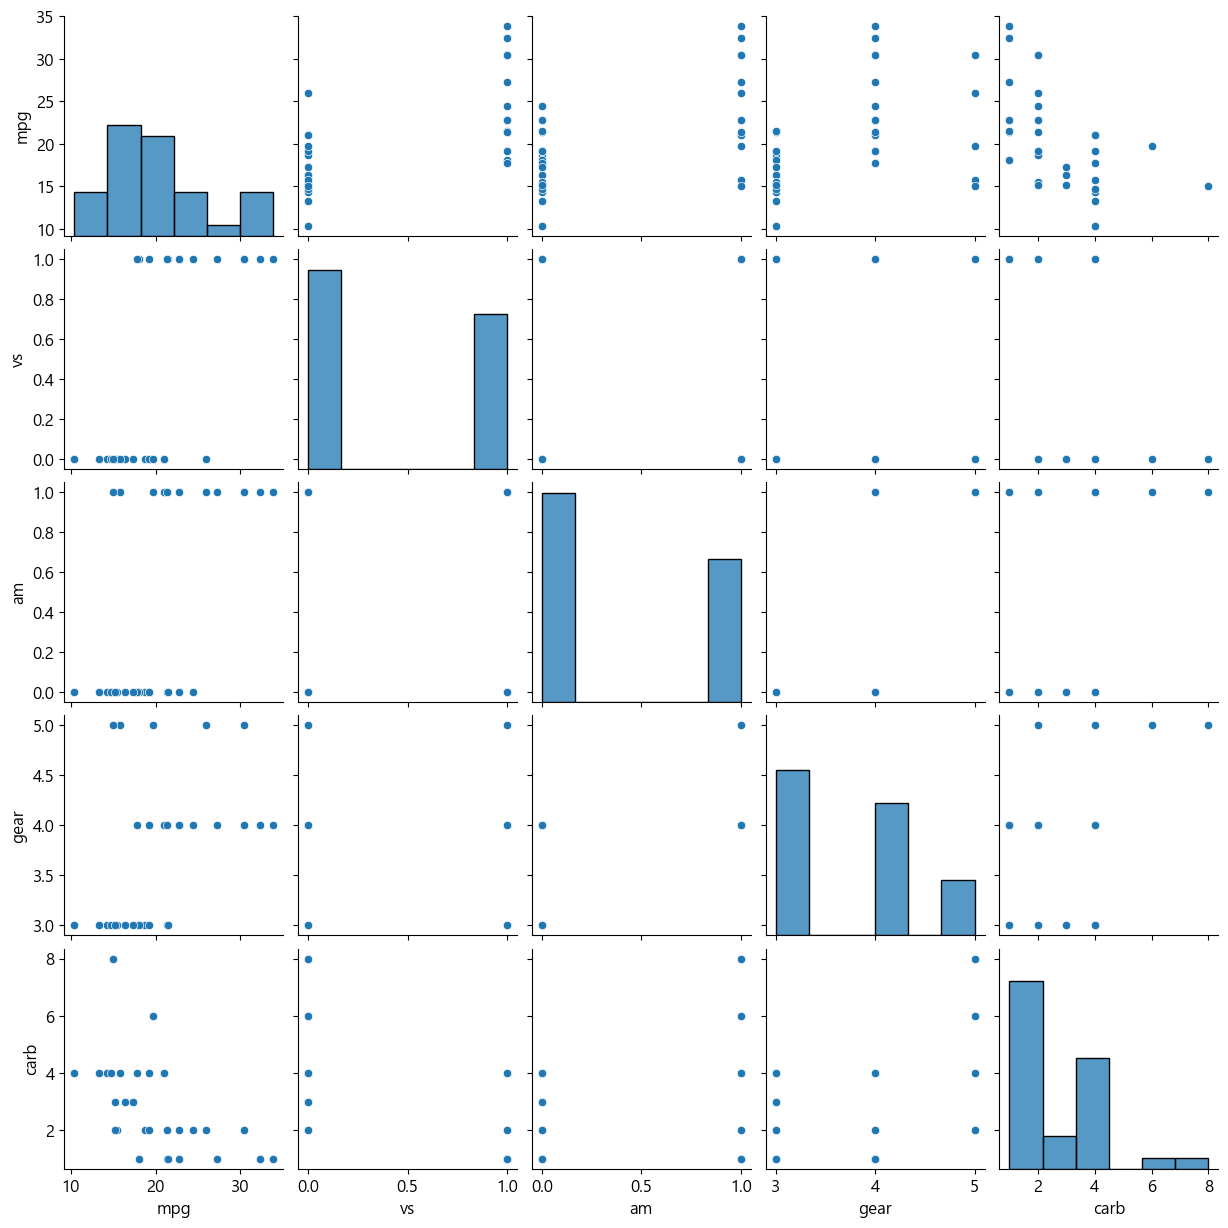

In [14]:
plt.rcParams["font.family"] = 'AppleGothic' if sys.platform == 'darwin' else 'Malgun Gothic'
plt.rcParams["font.size"] = 12
plt.rcParams["figure.figsize"] = (20, 20)
plt.rcParams["axes.unicode_minus"] = False

sb.pairplot(df)

### 3. 상관계수 행렬 시각화

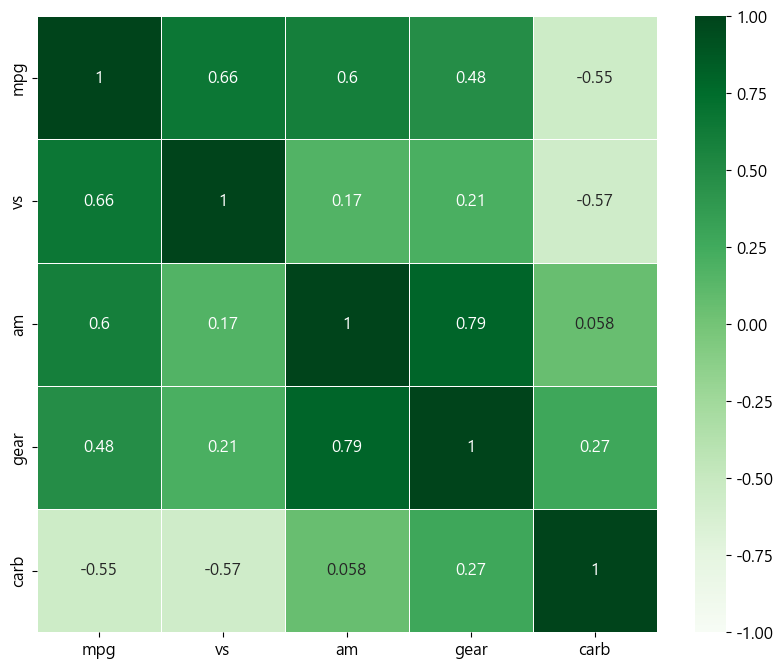

In [15]:
plt.rcParams["figure.figsize"] = (10,8)
sb.heatmap(df.corr(method='pearson'), annot = True, cmap = 'Greens', vmin = -1, vmax=1, linewidths=.5)
plt.show()
plt.close()

### 4. 결과 검정


In [9]:
names = df.columns
n = len(names)
pv = 0.05
data = []

for i in range(n):
    j = i+1 if i < (n-1) else 0

    fields = names[i] + "vs" + names[j]
    s, p = stats.spearmanr(df[names[i]],df[names[j]])
    result=p<pv
    data.append({'fields': fields,"statistics" : s,'p-value': p,'result':result })
rdf = pd.DataFrame(data)
rdf.set_index('fields',inplace =True)
rdf
    

,statistics,p-value,result
fields,,,
mpgvsvs,0.706597,6.191450e-06,True
vsvsam,0.168345,3.570439e-01,False
amvsgear,0.807688,2.304063e-08,True
gearvscarb,0.114887,5.312358e-01,False
carbvsmpg,-0.657498,4.337570e-05,True
